In [18]:
import numpy as np
import sympy as sym
import json
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.interpolate import interp1d
from IPython.display import display, IFrame, HTML
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
def load_hardware_data(filename, t_min_offset=0, t_max_offset=0):
    # load raw data
    with open(filename, 'r') as f:
        data = json.load(f)

    # convert lists to numpy arrays
    for val in data.values():
        for key in val.keys():
            val[key] = np.array(val[key])

    # create an array of times at which to subsample
    t_min = -np.inf
    t_max = np.inf
    for key, val in data.items():
        t_min = max(t_min, val['time'][0])
        t_max = min(t_max, val['time'][-1])
    t_min += t_min_offset * 1000
    t_max -= t_max_offset * 1000
    nt = int(1 + np.floor((t_max - t_min) / 10.))
    t = np.arange(0, 10 * nt, 10) / 1000.
    resampled_data = {'time': t}

    # resample raw data with linear interpolation
    for k, v in data.items():
        f = interp1d((v['time'] - t_min) / 1000., v['data'])
        resampled_data[k] = f(t)
        
    # return the resampled data
    return resampled_data

In [8]:
data = load_hardware_data(
    'squares.json', # <-- replace with name of file with hardware data
    t_min_offset=0.,      # <-- (optional) replace with how many seconds of data to ignore at start
    t_max_offset=0.,      # <-- (optional) replace with how many seconds of data to ignore at end
)

In [13]:
# time
t = data['time']

# position
o_x = data['ae483log.o_x']
o_y = data['ae483log.o_y']
o_z = data['ae483log.o_z']

# desired position
o_x_des = data['ae483log.o_x_des']
o_y_des = data['ae483log.o_y_des']
o_z_des = data['ae483log.o_z_des']

# orientation
psi = data['ae483log.psi']
theta = data['ae483log.theta']
phi = data['ae483log.phi']

# Inputs
x_meas = data['ae483log.x_meas']
y_meas = data['ae483log.y_meas']
z_meas = data['ae483log.z_meas']

# Velocities
v_x = data['ae483log.v_x']
v_y = data['ae483log.v_y']
v_z = data['ae483log.v_z']

# motor power commands
m_1 = data['ae483log.m_1']
m_2 = data['ae483log.m_2']
m_3 = data['ae483log.m_3']
m_4 = data['ae483log.m_4']

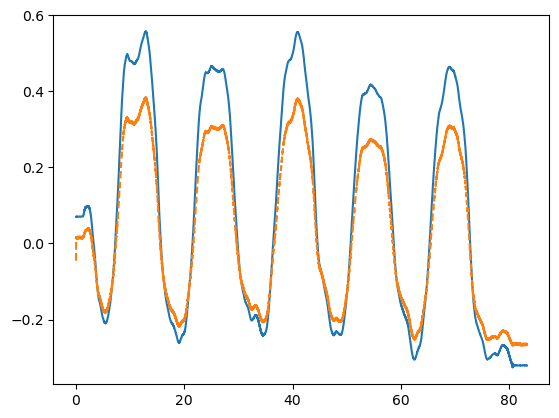

In [14]:
plt.plot(t, x_meas)
plt.plot(t, o_x, linestyle='--')

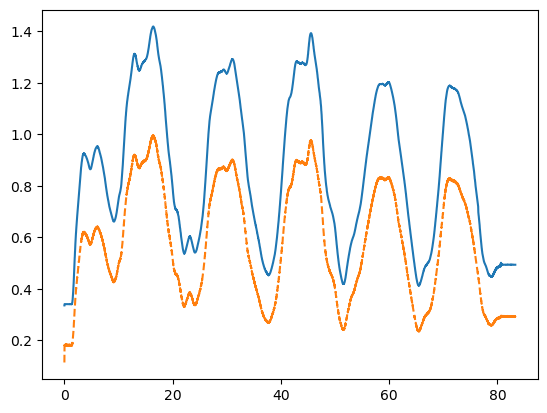

In [15]:
plt.plot(t,y_meas)
plt.plot(t, o_y, linestyle='--')

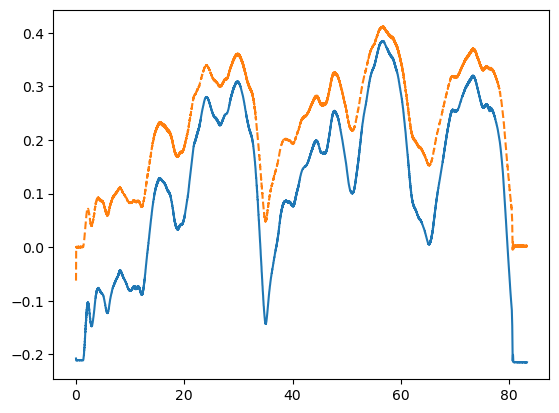

In [17]:
plt.plot(t, z_meas)
plt.plot(t, o_z, linestyle='--')

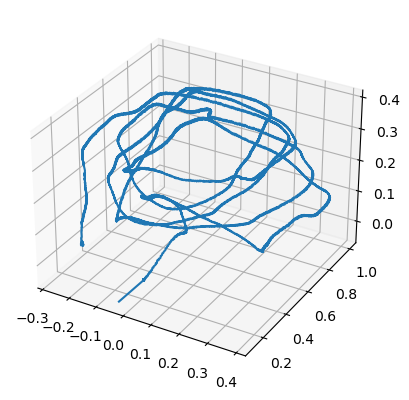

In [23]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(o_x, o_y, o_z)
#ax.plot(x_meas, y_meas, z_meas)

plt.show()